<a href="https://colab.research.google.com/github/mehryar-sb/FitClub/blob/main/damp_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
m = 10
k = 360
x0 = -2
v0 = 0
u = 0.3
g= 9.81
Wn = np.sqrt(k/m)
time_step = 0.01

In [ ]:
def sode1(x,t):
    x,z = x
    dxdt = [z,-u*g-(k/m)*x]
    return dxdt

def sode2(x,t):
    x,z = x
    dxdt = [z,u*g-(k/m)*x]
    return dxdt

In [ ]:
T = (2*np.pi)/Wn
t_cut = T/2
t_cut

0.5235987755982988

In [ ]:
plt.figure(figsize=(13,5))
plt.axhline(y=0, color='black',linewidth=0.9)
plt.axvline(x=0, color='black',linewidth=0.9)
plt.grid()
i = 0
li_sol = []
while True:
  t1 = np.arange(t_cut*i,t_cut*(i+1)+time_step,time_step)
  if i%2 == 0:
    sol = odeint(sode1,[x0,v0],t1)
    x0 = sol[:,0].max()
    li_sol.append(sol[:,0])
    plt.plot(t1,sol[:,0])
  else:
    sol = odeint(sode2,[x0,v0],t1)
    x0 = sol[:,0].min()
    li_sol.append(sol[:,0])
    plt.plot(t1,sol[:,0])
  i += 1
  if abs(x0) < ((u*m*g)/k):
    break

t = 2.9579938779914867,x = 0.03650471270505469


34

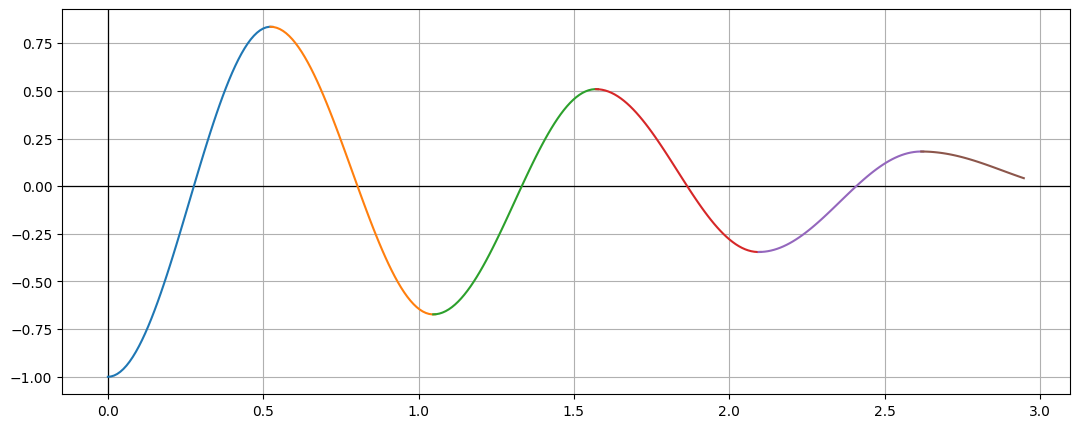

In [ ]:
plt.figure(figsize=(13,5))
plt.axhline(y=0, color='black',linewidth=0.9)
plt.axvline(x=0, color='black',linewidth=0.9)
plt.grid()
j = 0
for s in li_sol:
  t2 = np.arange(t_cut*j,t_cut*(j+1)+time_step,time_step)
  if j == len(li_sol)-1:
    ind = np.where(np.abs(s)<(.5*u*m*g)/k)[0][0]
    print(f"t = {t2[ind]},x = {s[ind]}")
    plt.plot(t2[:ind],s[:ind])
  else:
    plt.plot(t2,s)
  j+=1